In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [5]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]
print(n_samples)

17


In [6]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [7]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.115671, W: 0.140044, b: 1.589932
step: 100, loss: 0.111240, W: 0.146619, b: 1.543318
step: 150, loss: 0.107316, W: 0.152807, b: 1.499450
step: 200, loss: 0.103840, W: 0.158630, b: 1.458167
step: 250, loss: 0.100762, W: 0.164110, b: 1.419316
step: 300, loss: 0.098037, W: 0.169267, b: 1.382755
step: 350, loss: 0.095622, W: 0.174120, b: 1.348348
step: 400, loss: 0.093484, W: 0.178687, b: 1.315969
step: 450, loss: 0.091591, W: 0.182985, b: 1.285496
step: 500, loss: 0.089914, W: 0.187030, b: 1.256820
step: 550, loss: 0.088429, W: 0.190837, b: 1.229833
step: 600, loss: 0.087114, W: 0.194419, b: 1.204436
step: 650, loss: 0.085949, W: 0.197790, b: 1.180536
step: 700, loss: 0.084917, W: 0.200963, b: 1.158044
step: 750, loss: 0.084004, W: 0.203948, b: 1.136877
step: 800, loss: 0.083194, W: 0.206758, b: 1.116957
step: 850, loss: 0.082478, W: 0.209402, b: 1.098211
step: 900, loss: 0.081843, W: 0.211891, b: 1.080569
step: 950, loss: 0.081281, W: 0.214233, b: 1.063967
step: 1000, l

In [9]:
import matplotlib.pyplot as plt

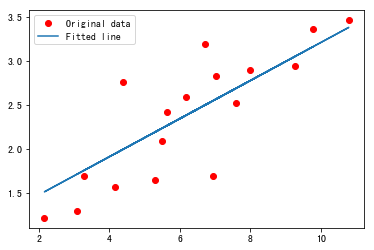

In [10]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()